In [67]:
!pip install ipython-sql

In [68]:
!pip install pyodbc

In [113]:
!pip install sqlalchemy pyodbc

In [25]:
!pip install --upgrade pandas sqlalchemy

In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [181]:
from sqlalchemy import create_engine, Table, inspect, text, select

In [182]:
from sqlalchemy.exc import NoSuchTableError

In [183]:
import pandas as pd

In [184]:
from scipy import stats

In [185]:
import numpy as np

In [186]:
import matplotlib.pyplot as plt

In [234]:
# Skapar en SQLAlchemy URI med Windows-autentisering för att ansluta till databasen
engine = create_engine("mssql://DESKTOP-I43ENBO/AdventureWorks2022?trusted_connection=yes&driver=ODBC+Driver+17+for+SQL+Server")

In [235]:
print(type(engine))

<class 'sqlalchemy.engine.base.Engine'>


In [236]:
# Koden skapar en anslutning till databasen med den tidigare skapade motorn
connection = engine.connect() 

In [237]:
print(type(connection))

<class 'sqlalchemy.engine.base.Connection'>


In [238]:
# Utforskar databasen
inspector = inspect(engine)
# Hämtar lista över alla scheman i databasen
schemas = inspector.get_schema_names()
print(schemas)

['db_accessadmin', 'db_backupoperator', 'db_datareader', 'db_datawriter', 'db_ddladmin', 'db_denydatareader', 'db_denydatawriter', 'db_owner', 'db_securityadmin', 'dbo', 'guest', 'HumanResources', 'INFORMATION_SCHEMA', 'Person', 'Production', 'Purchasing', 'Sales', 'sys']


In [239]:
# Hämtar en lista över aktuella schemat
for schema in schemas:
    print(schema)

db_accessadmin
db_backupoperator
db_datareader
db_datawriter
db_ddladmin
db_denydatareader
db_denydatawriter
db_owner
db_securityadmin
dbo
guest
HumanResources
INFORMATION_SCHEMA
Person
Production
Purchasing
Sales
sys


In [240]:
schemas = ['Sales', 'Production']
for schema in schemas:
    table_names = inspector.get_table_names(schema=schema)
    print(f"Tabellnamn i schema {schema}: {table_names}")

Tabellnamn i schema Sales: ['CountryRegionCurrency', 'CreditCard', 'Currency', 'CurrencyRate', 'Customer', 'PersonCreditCard', 'SalesOrderDetail', 'SalesOrderHeader', 'SalesOrderHeaderSalesReason', 'SalesPerson', 'SalesPersonQuotaHistory', 'SalesReason', 'SalesTaxRate', 'SalesTerritory', 'SalesTerritoryHistory', 'ShoppingCartItem', 'SpecialOffer', 'SpecialOfferProduct', 'Store']
Tabellnamn i schema Production: ['BillOfMaterials', 'Culture', 'Document', 'Illustration', 'Location', 'Product', 'ProductCategory', 'ProductCostHistory', 'ProductDescription', 'ProductDocument', 'ProductInventory', 'ProductListPriceHistory', 'ProductModel', 'ProductModelIllustration', 'ProductModelProductDescriptionCulture', 'ProductPhoto', 'ProductProductPhoto', 'ProductReview', 'ProductSubcategory', 'ScrapReason', 'TransactionHistory', 'TransactionHistoryArchive', 'UnitMeasure', 'WorkOrder', 'WorkOrderRouting']


In [241]:
schemas = ['Production', 'Sales']
tables = {'Product': 'Production', 'SalesOrderHeader': 'Sales', 'SalesOrderDetail' : 'Sales'}


for schema in schemas:
    table_names = inspector.get_table_names(schema=schema)
    for table_name, schema_name in tables.items():
        if table_name in table_names:
            try:
                columns = inspector.get_columns(table_name=table_name, schema=schema_name)
                for col in columns:
                    print(f"Tabell: {table_name}, Schema: {schema_name}, Kolumnnamn: {col['name']}")
            except NoSuchTableError:
                print(f"Tabell '{table_name}' finns inte i schemat '{schema_name}'.")
        else:
            print(f"Tabell '{table_name}' finns inte i schemat '{schema}'.")
            

Tabell: Product, Schema: Production, Kolumnnamn: ProductID
Tabell: Product, Schema: Production, Kolumnnamn: Name
Tabell: Product, Schema: Production, Kolumnnamn: ProductNumber
Tabell: Product, Schema: Production, Kolumnnamn: MakeFlag
Tabell: Product, Schema: Production, Kolumnnamn: FinishedGoodsFlag
Tabell: Product, Schema: Production, Kolumnnamn: Color
Tabell: Product, Schema: Production, Kolumnnamn: SafetyStockLevel
Tabell: Product, Schema: Production, Kolumnnamn: ReorderPoint
Tabell: Product, Schema: Production, Kolumnnamn: StandardCost
Tabell: Product, Schema: Production, Kolumnnamn: ListPrice
Tabell: Product, Schema: Production, Kolumnnamn: Size
Tabell: Product, Schema: Production, Kolumnnamn: SizeUnitMeasureCode
Tabell: Product, Schema: Production, Kolumnnamn: WeightUnitMeasureCode
Tabell: Product, Schema: Production, Kolumnnamn: Weight
Tabell: Product, Schema: Production, Kolumnnamn: DaysToManufacture
Tabell: Product, Schema: Production, Kolumnnamn: ProductLine
Tabell: Product, 

In [244]:
#orderqty_df = pd.read_sql(sql_query_orderqty, engine)
sql_query_orderqty = text("SELECT ProductID, OrderQty FROM Sales.SalesOrderDetail")
orderqty_df = pd.read_sql(sql_query_orderqty, engine)

In [246]:
sql_query_name = text("SELECT Name, ProductID FROM Production.Product")
name_df = pd.read_sql(sql_query_name, engine)

In [247]:
combined_df = pd.merge(orderqty_df, name_df, on='ProductID', how='inner')

In [248]:
# Hämtar datan från databasen och lagrar det i en Pandas DataFrame
result_df = pd.read_sql_query(sql_query, connection)

In [249]:
# Räknar medelvärdet av data i kolumnen 'OrderQty'
mean_order_qty = result_df['OrderQty'].mean()

In [250]:
# Antalet föräljningsorder
n = len(result_df)

In [251]:
confidence_level = 0.95

In [252]:
# Beräkna standardavvikelsen
std_dev = result_df['OrderQty'].std()

In [253]:
# Använder t-fördelningen för att räkna ut konfidensintervallet
t_critical = stats.t.ppf((1 + confidence_level) / 2, df=n - 1)

In [254]:
# Räknar ut standardfelet. Kvadratroten av n
standard_error = std_dev / (n**0.5)

In [255]:
margin_of_error = t_critical * standard_error
# Räknar ut konfidensintervallet för medelvärdet av orderantalet
confidence_interval = (mean_order_qty - margin_of_error, mean_order_qty + margin_of_error)

In [256]:
print("Konfidensintervall för medelvärdet av orderantalet:", confidence_interval)

Konfidensintervall för medelvärdet av orderantalet: (2.252060625179011, 2.28009892377126)


In [257]:
print(result_df.columns)

Index(['OrderQty'], dtype='object')


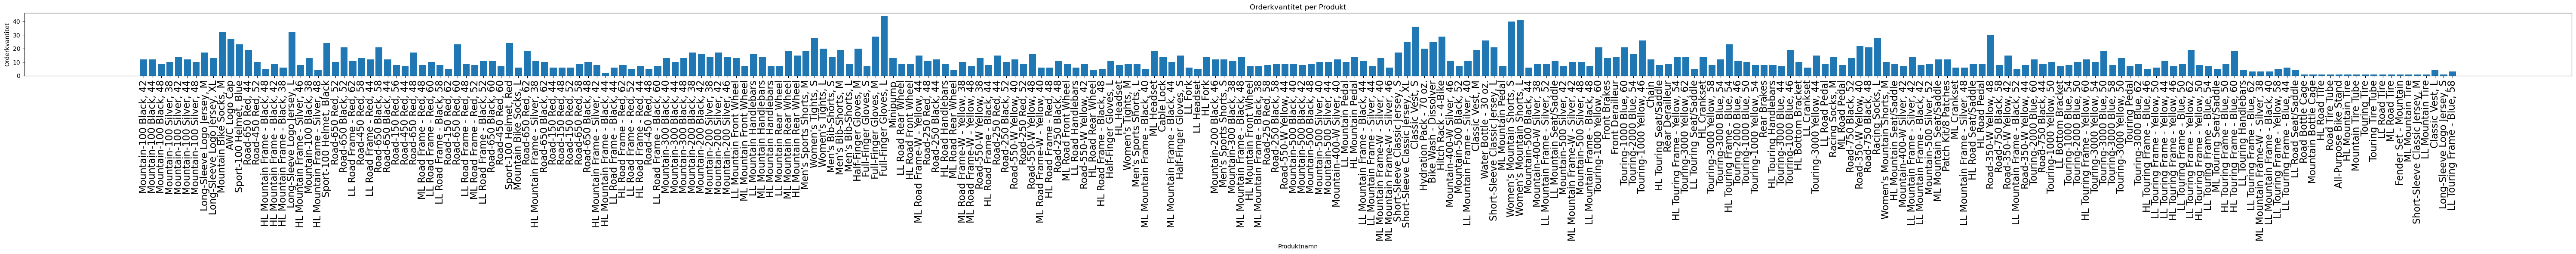

In [268]:
#Väljer storlek på stapeldiagrammet
plt.figure(figsize=(60, 6))
#kombinerar två DataFrame med olika kolumnnamn för dom är från två olika schema
plt.bar(combined_df['Name'], combined_df['OrderQty'])
plt.xlabel('Produktnamn')
plt.ylabel('Orderkvantitet')
plt.title('Orderkvantitet per Produkt')
plt.xticks(rotation=45, fontsize=16)  # Justera vinkel och textstorlek
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [263]:
connection.close()